<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Осмотр данных</a></span></li><li><span><a href="#Проверка-расчета" data-toc-modified-id="Проверка-расчета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов" data-toc-modified-id="Изменение-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов</a></span></li><li><span><a href="#Распределение-размеров-гранул" data-toc-modified-id="Распределение-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул</a></span></li><li><span><a href="#Суммарная-концентрация-веществ" data-toc-modified-id="Суммарная-концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовить прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Ход работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


Целевые признаки:

- эффективность обогащения чернового концентрата `rougher.output.recovery`
- эффективность обогащения финального концентрата `final.output.recovery`


## Подготовка данных

### Осмотр данных

In [ ]:
!pip install missingno

In [148]:
#!pip install sweetviz

In [149]:
# импорт библиотек
import pandas as pd
#import sweetviz as sv
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
# импорт библиотеки для анализа пропусков
import missingno as msno

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [150]:
# чтение файлов с данными и сохранение
df_train = pd.read_csv('C:/Users/pr_full2_gold_recovery_train_new.csv')
df_test = pd.read_csv('C:/Users/pr_full2_gold_recovery_test_new.csv')
df_full = pd.read_csv('C:/Users/pr_full2_gold_recovery_full_new.csv')

In [151]:
df_dict = {'df_train' : df_train, 'df_test' : df_test, 'df_full' : df_full}

In [152]:
for el in df_dict:
    print('{:^50}'.format(el))
    print(df_dict[el].info())

                     df_train                     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol    

In [153]:
df_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


**Вывод**

- В таблицах есть пропуски
- Все данные, кроме даты, числовые. Столбец `data` имеет формат `object`.

Поскольку колонок много, сделаем функцию для быстрого поиска нужных столбцов

In [154]:
# функиця для поиска названий колонок в датафрейме
def columns_search(df, word, exception=None):
    '''
    df - датафрем, в котором ищем названия колонок
    word - строка, которая должна содержаться в названии
    exception - строка (или список строк), которая не должна содержаться в названии
    '''
    result = []
    all_columns = df.columns.tolist()
    if type(exception) is str:
        exception = [exception]

    for name in all_columns:
        if exception is None:
            if word in name:
                result.append(name)
        else:
            if word in name:
                status = 0
                for el in exception:
                    if el in name:
                        break
                    elif el not in name:
                        status += 1
                if status == len(exception):
                    result.append(name)
                          
    return result

### Проверка расчета

Проверим, что эффективность обогащения рассчитана правильно.

In [155]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
rougher_output_recovery_df = df_train['rougher.output.recovery']
rougher_output_recovery_calculated = C * ( F - T) / (F * (C - T)) * 100

In [156]:
mae = mean_absolute_error(rougher_output_recovery_calculated, rougher_output_recovery_df)
mae

9.73512347450521e-15

**Вывод**

Значение МАЕ получилось близким к нулю. Это говорит о том, что эффективность обогощения посчитана правильно

### Анализ признаков

Некоторые признаки, недоступны в тестовой выборке (53 колонки протов 87 в полном датасете). Найдем их

In [157]:
extra_features = df_train.columns.difference(df_test.columns)
extra_features

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Параметры, не вошедшие в тестотвую выборку (замеряются и/или рассчитываются значительно позже):
1. концентрации элементов в продукте и в отвальных хвостах после флотации
2. концентрации элементов в продукте и в отвальных хвостах после первой очистки
3. концентрация элементов в отвальных хвостах после второй очистки
4. финальные концентрации элементов в продукте и отвальных хвостах
5. расчётные характеристики для флотации
6. эфективность обогащения после флотации и итоговая (целевой признак)

Таким образом, в тестовом датасете присутствуют входные параметры и параметры текущего состояния этапа обогащения, но выходные (в  т.ч. параметры, характеризующие финальный этап) и расчетные параметры  отсутствуют.

In [158]:
df_extra_features = df_train[extra_features]
#report2 = sv.analyze([df_extra_features, "extra_features"])

In [159]:
#report2.show_notebook(w=940, h=550, scale=0.9)

### Предобработка данных

Преобразуем столбец даты в подходящий тип

In [160]:
for df in df_dict:
    df_dict[df]['date'] = pd.to_datetime(df_dict[df]['date'], format='%Y-%m-%d %H:%M:%S')

В таблицах есть пропуски. Посмотрим на их количество

In [161]:
# функция подсчета числа и доли пропусков в столбцах
def missed(df, n):
    """
    1 - возвращает таблицу, пригодную для дальнейшей работы
    2 - возвращает отформатированную таблицу 
    3 - возвращает describe таблицы
    4 - возвращает строки, в которых пропусков более 3%
    5 - % пропущенных строк от размера всей таблицы
    """
    
    table = df.isna().agg(['sum', 'mean']).T
    
    if n == 1:
        return table
    if n == 2:
        return table.style.format({'mean': '{:.2%}'})
    if n == 3:
        return table.describe()
    if n == 4:
        return table.query('mean > 0.03') 
    if n == 5:
        return round(table['sum'].sum() / len(df) * 100, 2)

In [162]:
for el in df_dict:
    print('{:^30}'.format(el))
    print(missed(df_dict[el], 3))
    print(f'% строк с пропусками:', missed(df_dict[el], 5))
    print()

           df_train           
               sum       mean
count    87.000000  87.000000
mean     47.126437   0.003331
std     186.800590   0.013202
min       0.000000   0.000000
25%       0.000000   0.000000
50%       1.000000   0.000071
75%       8.000000   0.000565
max    1605.000000   0.113436
% строк с пропусками: 28.98

           df_test            
             sum       mean
count  53.000000  53.000000
mean    1.698113   0.000321
std     4.729551   0.000894
min     0.000000   0.000000
25%     0.000000   0.000000
50%     0.000000   0.000000
75%     0.000000   0.000000
max    25.000000   0.004726
% строк с пропусками: 1.7

           df_full            
               sum       mean
count    87.000000  87.000000
mean     51.505747   0.002650
std     202.776935   0.010431
min       0.000000   0.000000
25%       0.000000   0.000000
50%       1.000000   0.000051
75%      11.500000   0.000592
max    1748.000000   0.089922
% строк с пропусками: 23.05



In [163]:
# строки с пропусками более 3%
missed(df_train, 4)

,sum,mean
rougher.input.floatbank11_xanthate,428.0,0.030249
rougher.state.floatbank10_e_air,436.0,0.030815
secondary_cleaner.output.tail_sol,1605.0,0.113436


In [164]:
# строки с пропусками более 3%
missed(df_full, 4) 

,sum,mean
secondary_cleaner.output.tail_sol,1748.0,0.089922


- В большинстве строк с пропусками доля пропусков составляет менее 1%
- В таблице c обучающими данными призник `secondary_cleaner.output.tail_sol` имеет 11% пропусков.
- В талбице с полными данными также столбец `secondary_cleaner.output.tail_sol` имеет пропусков около 9%	

Поскольку данные индексируются датой и временем получения информации (признак date), попробуем посмотреть,  можно ли заполнить пропуски предыдущим или следующим значением.

In [165]:
#msno.matrix(df_train);

In [166]:
df_train0 = pd.read_csv('C:/Users/Марина/YandexDisk/Обучение/Проекты с Практикума/сб2/pr_full2_gold_recovery_train_new.csv')

In [167]:
df_train0 = df_train0.fillna(method='ffill').fillna(method='bfill')

<AxesSubplot:xlabel='date'>

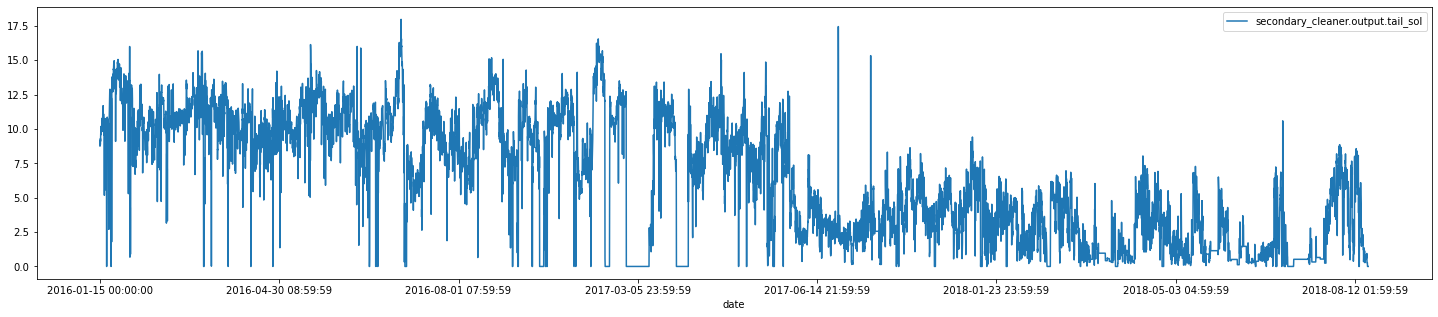

In [168]:
df_train0.plot(x='date', y='secondary_cleaner.output.tail_sol', figsize=(25,5))

<AxesSubplot:xlabel='date'>

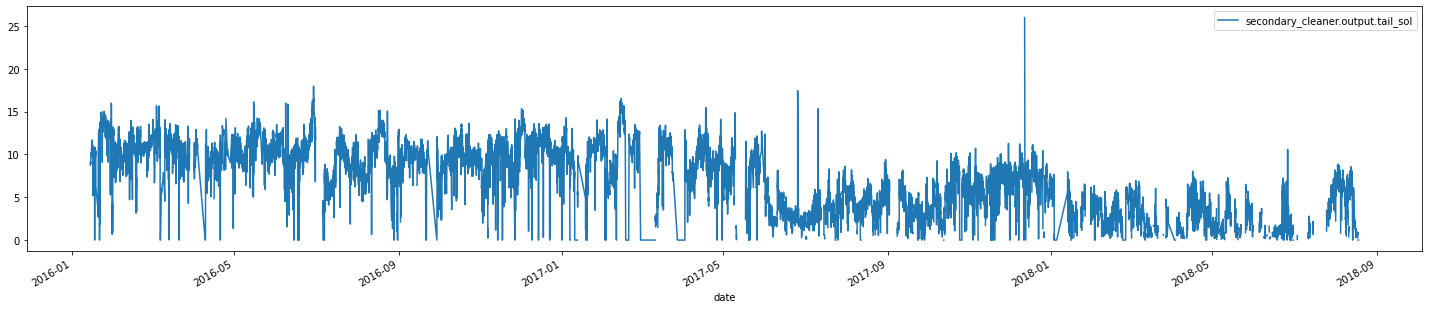

In [169]:
df_full.plot(x='date', y='secondary_cleaner.output.tail_sol', figsize=(25,5))

Посмотрим, насолько изменились распределения признаков

In [170]:
missed_more_1 = missed(df_train, 1).query('mean > 0.01').index.tolist()
df_train0_fill = df_train0[missed_more_1]
df_train_fill = df_train[missed_more_1]

In [171]:
#report0 = sv.compare(df_train0_fill, df_train_fill)

In [172]:
#report0.show_notebook(w=940, h=550, scale=0.9)

Из отчета видно, что при заполнении пропусков предыдущим и последующим значениями среднее и медиана у некоторых признаков сместились на десятые части. Однако у признака `secondary_cleaner.output.tail_sol`, у которого больше всего пропусков, эти парметры изменились сильнее.

In [173]:
df_train = df_train.fillna(method='ffill').fillna(method='bfill')
df_test = df_test.fillna(method='ffill').fillna(method='bfill')
df_full = df_full.fillna(method='ffill').fillna(method='bfill')

## Анализ данных

Составим отчет по данным полной таблицы

In [174]:
#report = sv.analyze([df_full, "full table"])

In [175]:
#report.show_notebook(w=940, h=550, scale=0.9)

### Изменение концентрации металлов

Посмотрим, как меняется концентрация металлов на различных стадиях обработки

In [176]:
au = columns_search(df_full, 'concentrate_au')
ag = columns_search(df_full, 'concentrate_ag')
pb = columns_search(df_full, 'concentrate_pb')
metals = {'au' : au , 'ag' : ag, 'pb' : pb}

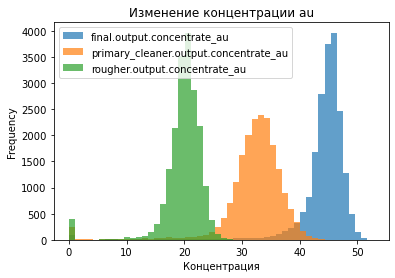

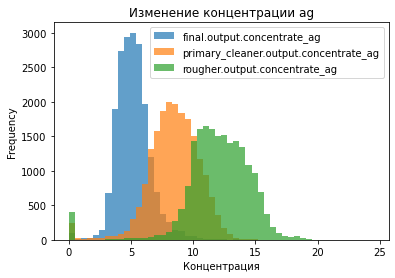

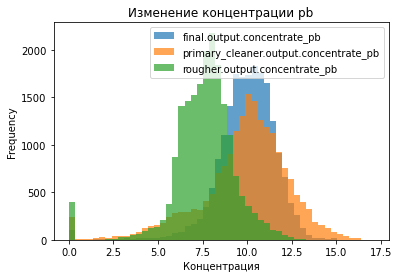

In [177]:
for key in metals:    
    df_full[metals[key]].plot(kind='hist', bins=50, alpha=0.7, legend=True)
    plt.xlabel('Концентрация', fontsize=10)
    plt.title('Изменение концентрации ' + key)
    plt.show()

**Вывод**

- Au: концентрация золота растет на каждом этапе очистки, как и ожидалось
- Ag: концентрация серебра падает в процессе, как и ожидалось
- Pb: концентрация свинца увеличилась после флотации, далее не изменялась
- Во всех распределениях есть аномальное значение около нуля

### Распределение размеров гранул 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

In [178]:
columns_search(df_full, 'feed_size')

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

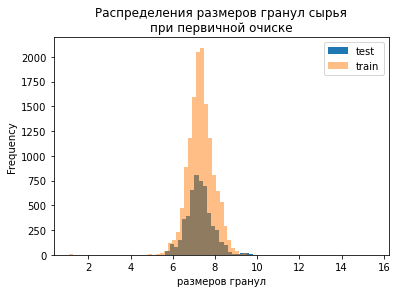

In [179]:
df_test['primary_cleaner.input.feed_size'].plot(kind='hist', bins=50, legend=True, alpha=1, label='test')
df_train['primary_cleaner.input.feed_size'].plot(kind='hist', bins=50, legend=True, alpha=0.5, label='train')
plt.title('Распределения размеров гранул сырья\nпри первичной очиске')
plt.xlabel('размеров гранул')
plt.show()

In [180]:
df_test['primary_cleaner.input.feed_size'].describe()

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

In [181]:
df_train['primary_cleaner.input.feed_size'].describe()

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

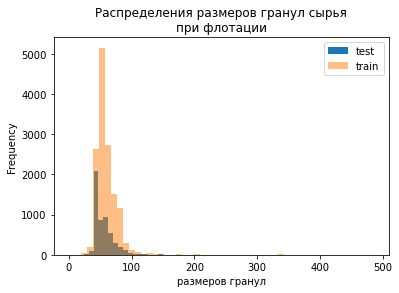

In [182]:
df_test['rougher.input.feed_size'].plot(kind='hist', bins=50, legend=True, alpha=1, label='test')
df_train['rougher.input.feed_size'].plot(kind='hist', bins=50, legend=True, alpha=0.5, label='train')
plt.title('Распределения размеров гранул сырья\nпри флотации')
plt.xlabel('размеров гранул')
plt.show()

In [183]:
df_test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [184]:
df_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

**Вывод**

Распределения на тестовой и обучающей выборки отличаются не сильно. 

### Суммарная концентрация веществ

Посмотрим на суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [185]:
concentrate = columns_search(df_full, 'concentrate', 'calculation') + columns_search(df_full, 'rougher.input.feed', ['rate', 'size'])
concentrate

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au']

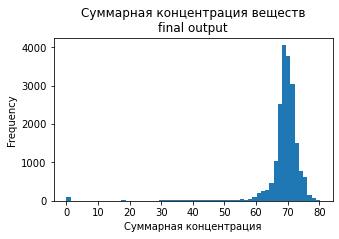

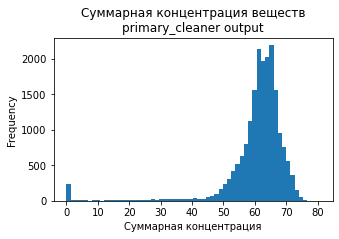

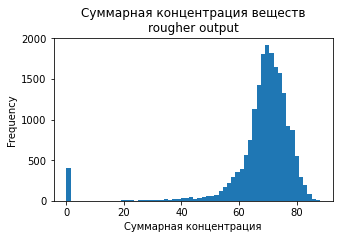

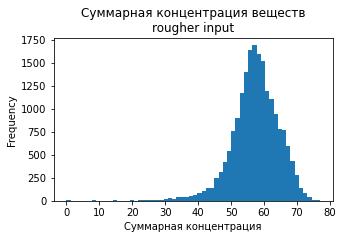

In [186]:
for i in range(0, len(concentrate), 4):
    name = concentrate[i].rsplit('.')
    df_full[concentrate[i:4+i]].sum(axis=1).plot(kind='hist', bins=60, figsize=(5,3))
    plt.xlabel('Суммарная концентрация')
    plt.title('Суммарная концентрация веществ\n' +  name[0]+' '+name[1])
    plt.show()

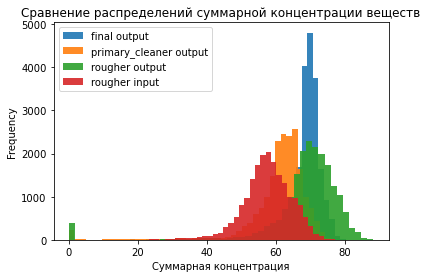

In [187]:
for i in range(0, len(concentrate), 4):
    name = concentrate[i].rsplit('.')
    df_full[concentrate[i:4+i]].sum(axis=1).plot(kind='hist', bins=50, legend=True, label=name[0]+' '+name[1], alpha=0.9)
plt.title('Сравнение распределений суммарной концентрации веществ')
plt.xlabel('Суммарная концентрация')
plt.show()

**Вывод**

В распределении суммарной концентрации есть аномалия около нуля. В распределении концентрации в сырье очень мало нулевых значений, аномалия проявляется после флотации и присутсвует после каждого этапа. Суммарная нулевая концентрация не имеет физического смысла (это значило бы, что в руде нет исследуемых веществ). Стоит удалить эти аномальные значения.

In [188]:
for i in range(len(concentrate)):
    df_full = df_full[df_full[concentrate[i]] != 0]

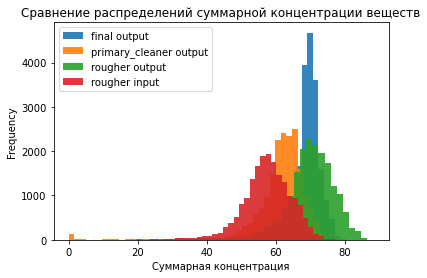

In [189]:
for i in range(0, len(concentrate), 4):
    name = concentrate[i].rsplit('.')
    df_full[concentrate[i:4+i]].sum(axis=1).plot(kind='hist', bins=50, legend=True, label=name[0]+' '+name[1], alpha=0.9)
plt.title('Сравнение распределений суммарной концентрации веществ')
plt.xlabel('Суммарная концентрация')
plt.show()

In [190]:
df_full[concentrate[4:8]].sum(axis=1).min()

0.03999999910593

Удалим строки с нулевыми значениями из тестовой и обучающей выборок

In [191]:
for i in range(len(concentrate)):
    df_train= df_train[df_train[concentrate[i]] != 0]

In [192]:
for i in concentrate[12:]:
    df_test = df_test[df_test[i] != 0]

## Модель

### Функция для вычисления sMAPE

In [193]:
def smape(true, predicted):
    return (abs(true - predicted) / ((abs(true) + abs(predicted)) / 2)).sum() / len(true) * 100

def result_smape(smape_rougher, smape_final):

    result = 0.25 * smape_rougher + 0.75 * smape_final
    return result

###  Построение моделей

Целевые признаки:

In [194]:
columns_search(df_full, 'recovery')

['final.output.recovery', 'rougher.output.recovery']

Будет две модели: для стадии `rougher` и стадии `final`.

Деление на тестовую и обучающую выборки не потребуется. Добавим в тестовую выборку целевые признаки

In [195]:
columns = ['final.output.recovery', 'rougher.output.recovery', 'date']
df_test = pd.merge(df_full[columns], df_test)
df_test.shape

(5122, 55)

Выделим целевой признаки и признаки. Признаки должны удовлетворять следующим условиям
- колонки есть и в тестовой и в обучающей выборках
- параметры колонок должны быть получены не позднее стадии, для которой ищем предсказания

In [196]:
# rougher
features_rougher = columns_search(df_test, 'rougher' , 'recovery')

target_train_rougher = df_train['rougher.output.recovery']
features_train_rougher = df_train[features_rougher]
print('features_train_rougher', features_train_rougher.shape)

target_test_rougher = df_test['rougher.output.recovery']
features_test_rougher = df_test[features_rougher]
print('features_test_rougher', features_test_rougher.shape)

features_train_rougher (13716, 22)
features_test_rougher (5122, 22)


Здесь признаки:

In [197]:
features_rougher

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']

In [198]:
# final
features_final = df_test.columns.tolist()[3:]

target_train_final= df_train['final.output.recovery']
features_train_final = df_train[features_final]
print('features_train_final', features_train_final.shape)

target_test_final = df_test['final.output.recovery']
features_test_final = df_test[features_final]
print('features_test_final', features_test_final.shape)


features_train_final (13716, 52)
features_test_final (5122, 52)


Здесь признаки:

In [199]:
features_final

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

Масштабируем числовые признаки с помощью z-преобразования. Метод StandardScaler() возвращает массив, мы же будем работать с таблицей

In [200]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

# rougher
scaler.fit(features_train_rougher)
features_train_rougher = pd.DataFrame(scaler.transform(features_train_rougher), columns=features_rougher)
features_test_rougher = pd.DataFrame(scaler.transform(features_test_rougher), columns=features_rougher)

# final
scaler.fit(features_train_final)
features_train_final = pd.DataFrame(scaler.transform(features_train_final), columns=features_final)
features_test_final = pd.DataFrame(scaler.transform(features_test_final), columns=features_final)

Для использования собственной метрики создадим свой объект

In [201]:
my_scorer = make_scorer(smape, greater_is_better=False)

Далее построим модели для предсказания

In [202]:
# Линейная регрессия
def linear_reg(features, target):
    model = LinearRegression()
    result = cross_val_score(model, features, target, scoring=my_scorer, cv=5).mean()
    return [abs(result), model]

In [203]:
# Дерево решений
def tree(features, target):
    best_model = None
    best_result = 10**5
    
    for depth in range(3, 7, 1):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
        result = abs(cross_val_score(model, features, target, scoring=my_scorer, cv=8).mean())
        
        if result < best_result:
            best_result = result
            best_model = model
            
    return [best_result, best_model]

In [204]:
# Случайный лес
def forest(features, target):
    best_model = None
    best_result = 10**5
    for depth in range(4, 15, 2):
        for n in range(40, 70, 5):
            model = RandomForestRegressor(random_state=12345, n_estimators=n, max_depth=depth, max_features="sqrt")
            result = abs(cross_val_score(model, features, target, scoring=my_scorer, cv=8).mean())

            if result < best_result:
                best_result = result
                best_model = model
    return [abs(best_result), best_model]

In [205]:
# k ближайших соседей
def neighbor(features, target):
    best_model = None
    best_result = 10**5
    for n in range(1, 12, 2):
        model = KNeighborsRegressor(n_neighbors=n)
        result = abs(cross_val_score(model, features, target, scoring=my_scorer, cv=8).mean())
        
        if result < best_result:
            best_result = result
            best_model = model
    return [abs(best_result), best_model]

In [121]:
# функция для происка лучшей модели
def model_search(features, target):
    best_model = None
    best_result = 10**5
    
    best_linear = linear_reg(features, target)
    best_tree = tree(features, target)
    best_forest = forest(features, target)
    best_neighbor = neighbor(features, target)
    
    names = {'best_linear' : best_linear, 'best_tree' : best_tree, 'best_forest' : best_forest, 'best_neighbor' : best_neighbor}
    best_models = pd.DataFrame([], columns=['model', 'smape'])
    
    for model in names:
        best_models.loc[len(best_models.index)] = [model, names[model][0]]
        
        if names[model][0] < best_result:
            best_result = names[model][0]
            best_model = names[model][1]

    return best_models, best_model, best_result

Ищем лучшую модель для `rougher.output.recovery`

In [122]:
%%time
table_rougher, best_model_rougher, best_result_rougher = model_search(features_train_rougher, target_train_rougher)

3 7.143696449726592
4 6.998603471029198
5 7.313054119244264
6 7.27491216409981
5 55 6.326269298584944
5 56 6.3328198052799
5 57 6.3264509921747685
5 58 6.32143664198894
5 59 6.323094069502424
5 60 6.330767736349743
5 61 6.335858662551729
5 62 6.332305172795614
5 63 6.3320793051430355
5 64 6.3193803850474985
7 55 6.33314121703029
7 56 6.3303370247846065
7 57 6.321464480478285
7 58 6.315459163431373
7 59 6.310130078870076
7 60 6.301974476870121
7 61 6.308084448794164
7 62 6.307540351415712
7 63 6.304853421768676
7 64 6.304587589544337
9 55 6.4128365197178425
9 56 6.410513817821139
9 57 6.409168573856443
9 58 6.400394941729414
9 59 6.40084919528533
9 60 6.411505245160127
9 61 6.411637453358514
9 62 6.39638242004796
9 63 6.402128856744216
9 64 6.407716058680277
Wall time: 6min 31s


In [211]:
# Таблица для сравнения параметров лучших моделей
table_rougher

,model,smape
0,best_linear,6.673364
1,best_tree,6.998603
2,best_forest,6.301974
3,best_neighbor,7.942452


In [212]:
best_model_rougher

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=60,
                      random_state=12345)

Проверим на тестовой выборке

In [216]:
rougher_model = RandomForestRegressor(
                max_depth=7, 
                max_features='sqrt', 
                n_estimators=60,
                random_state=12345).fit(features_train_rougher, target_train_rougher)
rougher_predictions = rougher_model.predict(features_test_rougher)
rougher_smape = smape(target_test_rougher, rougher_predictions)
print('rougher.output.recovery')
print('sMAPE на обучающей', round(best_result_rougher, 2), '%')
print('sMAPE на тестовой', round(rougher_smape, 2), '%')

rougher.output.recovery
sMAPE на обучающей 6.3 %
sMAPE на тестовой 4.02 %


Ищем лучшую модель для `final.output.recovery`

In [214]:
%%time
table_final, best_model_final, best_result_final = model_search(features_train_final, target_train_final)

30 10.434247908925805
32 10.399593946478118
34 10.366595887835496
36 10.338831432624897
38 10.301512724562539
40 10.272517292716994
42 10.247861728765157
44 10.22019152452744
46 10.192140253672505
48 10.164728518513847
Wall time: 11min 26s


In [215]:
# Таблица для сравнения параметров лучших моделей
table_final

,model,smape
0,best_linear,10.940824
1,best_tree,9.307701
2,best_forest,9.083529
3,best_neighbor,10.164729


In [217]:
best_model_final

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=65,
                      random_state=12345)

Проверим на тестовой выборке

In [218]:
final_model = RandomForestRegressor(
    max_depth=5, 
    max_features='sqrt', 
    n_estimators=65,
    random_state=12345
).fit(features_train_final, target_train_final)
final_predictions = final_model.predict(features_test_final)
final_smape = smape(target_test_final, final_predictions)
print('final.output.recovery')
print('sMAPE на обучающей', round(best_result_final, 2), '%')
print('sMAPE на тестовой', round(final_smape, 2), '%')

final.output.recovery
sMAPE на обучающей 9.08 %
sMAPE на тестовой 7.45 %


Итоговое sMAPE:

In [219]:
answer_train = result_smape(best_result_rougher, best_result_final)
answer = result_smape(rougher_smape, final_smape)
print('Итоговое sMAPE на обучающей:', round(answer_train, 2), '%')
print('Итоговое sMAPE на тестовой:', round(answer, 2), '%')

Итоговое sMAPE на обучающей: 8.39 %
Итоговое sMAPE на тестовой: 6.59 %


**Вывод**
- Лучшая модель для `rougher.output.recovery`: случайный лес с глубиной 7 и 70 деревьями
- Лучшая модель для `rougher.output.recovery`: случайный лес с глубиной 5 и 65 деревьями

Метрика sMAPE меньше на тестовой выборке на 2-3%. 

## Вывод

Необходимо было решить задачу регресси для прогноза двух величин:
- эффективность обогащения чернового концентрата `rougher.output.recovery`;
- эффективность обогащения финального концентрата `final.output.recovery`.

Ход работы:
1. Данные были загружены (три таблицы с обучающей, тестовой выборками и таблица с полным набором данных). Проведен первичный осмотр. Выявлено наличие пропусков и несоответсвие столбца `date` типу DateTime.
2. Проверен расчет для признака `rougher.output.recovery`. Признак рассчитан правильно, поскольку MAE близко к нулю.
3. Найдены признаки, не вошедшие в тестовую выборку. В тестовом датасете присутствуют входные параметры и параметры текущего состояния этапа обогащения, но выходные (в т.ч. параметры, характеризующие финальный этап) и расчетные параметры отсутствуют. Отсуствие части признаков в тестовой выборке говорит о том, что для построения моделей необходимо использовать признаки, входящие в тестовый набор.
4. Данные предобработаны. 
    - Столбец `date` приведет к необходимому виду.
    - Пропуски проанализированы. Больше всего пропусков наблюдается в столбце `secondary_cleaner.output.tail_sol` (8 и 11% в полной и обучающей выборках соответсвенно). 
    - Поскольку общее число строк с пропусками в полной и тестовой выборках составляет более 20%, было решено заполнить пропуски соседними значениями. Такое решение обусловленно тем, что соседние строки имеют близкие значения.
3. Построены распределения концентрация металлов (Au, Ag, Pb) на различных этапах очистки.  
    - Au: концентрация золота растет на каждом этапе очистки, как и ожидалось
    - Ag: концентрация серебра падает в процессе, как и ожидалось
    - Pb: концентрация свинца увеличилась после флотации, далее не изменялась
4. Проверены распределения размеров гранул сырья на обучающей и тестовой выборках. Распределения мало отличаются
5. Построены распределения суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. В распределении суммарной концентрации есть аномалия около нуля. Поскольку суммарная нулевая концентрация не имеет физического смысл,  аномальные значения были удалены.
6. Написана функция для вычисления sMAPE.
7. Подготовлены признаки для прогноза обех величин. Признаки были отмасштабированы с помощью z-преобразования. Далее построены модели регрессии. Определена лучшая модель по метрике sMAPE.
8. Модель протестирована на тестовой выборке  и посчитана итоговая метрика.

Лучшая модель для `rougher.output.recovery`:

In [220]:
best_model_rougher

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=60,
                      random_state=12345)

Лучшая модель для `final.output.recovery`:

In [221]:
best_model_final

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=65,
                      random_state=12345)

Итоговое sMAPE:

In [222]:
print('Итоговое sMAPE на обучающей:', round(answer_train, 2), '%')
print('Итоговое sMAPE на тестовой:', round(answer, 2), '%')

Итоговое sMAPE на обучающей: 8.39 %
Итоговое sMAPE на тестовой: 6.59 %
